In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

class PhysicalImageDimensions(object):
    def __init__(self, w_pixels: int, h_pixels: int, w_mm : float, h_mm: float, rescale_factor : int = 1):
        self.__w_pixels = w_pixels
        self.__h_pixels = h_pixels
        self.__w_mm = w_mm
        self.__h_mm = h_mm
        self.__rescale_factor = rescale_factor
    @property
    def w(self) -> int:
        return self.__w_pixels
    @property
    def h(self) -> int:
        return self.__h_pixels
    @property
    def w_mm(self) -> float:
        return self.__w_mm
    @property
    def h_mm(self) -> float:
        return self.__h_mm

    @property
    def shape(self) -> tuple:
        return (self.h * self.__rescale_factor ,self.w * self.__rescale_factor, 4)
    
    @property
    def physical_shape(self) -> tuple:
        return (self.h_mm,self.w_mm)
    
    @property
    def h_ppmm(self) -> int:
        """Pixels Per mm"""
        return self.h * self.__rescale_factor / self.h_mm
    
    @property
    def w_ppmm(self) -> int:
        """Pixels Per mm"""
        return self.w * self.__rescale_factor / self.w_mm

class PhysicalPictureFile(object):
    def __init__(self, path : str, w_mm : float, h_mm: float ) -> None:
        img = cv2.imread( path )
        self.__img = img
        h, w,_ = img.shape
        self.__physical_image = PhysicalImageDimensions(
            w_pixels=w,
            h_pixels=h,
            w_mm=w_mm,
            h_mm=h_mm
        )
    @property
    def physical_dimensions(self) -> PhysicalImageDimensions:
        return self.__physical_image

    @property
    def img(self):
        return self.__img

    @property
    def shape(self) -> tuple:
        return self.__img.shape
    
    @property
    def channels(self) -> int:
        return self.__img.shape[2]

    @property
    def physical_shape(self) -> tuple:
        return (self.__physical_image.h_mm, self.__physical_image.w_mm)


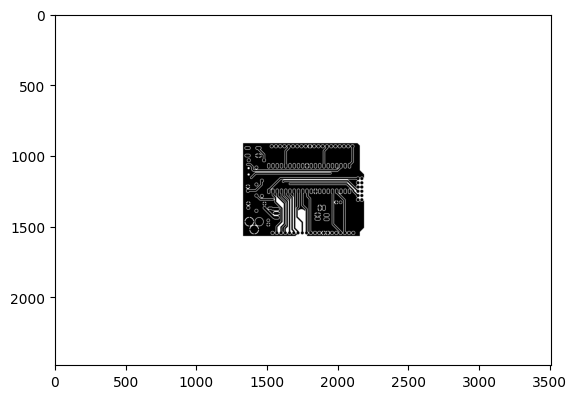

In [2]:
assets_folder= "assets/Output/"
file_name = "ArduPingu-B_Cu.png"

# Load an image with the A4 paper size
png = PhysicalPictureFile( assets_folder + file_name, w_mm=297.0, h_mm=210.0 )

plt.imshow( png.img )

In [3]:
lcd = PhysicalImageDimensions( w_pixels=1920, h_pixels=1080, w_mm=510.0, h_mm=285.0, rescale_factor=1 )

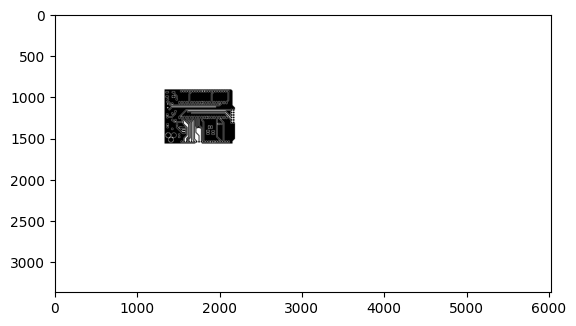

In [4]:
if( (png.physical_dimensions.h_mm > lcd.h_mm) or (png.physical_dimensions.w_mm > lcd.w_mm) ):
    raise Exception(f"Picture physical size is greater than the LCD: LCD[{lcd.physical_shape} mm] picture[{png.physical_shape} mm]")

lcd_h_pixels = int( lcd.h_mm * png.physical_dimensions.h_ppmm )
lcd_w_pixels = int( lcd.w_mm * png.physical_dimensions.w_ppmm )

(h,w,c) = png.img.shape

# Add Horizontal Pixels to resize width
lcd_frame_buffer = cv2.hconcat( [ png.img, 255 * np.ones( shape=( h, lcd_w_pixels - w, c ), dtype=np.uint8 ) ] )
lcd_frame_buffer = cv2.vconcat( [ lcd_frame_buffer, 255* np.ones( shape=( lcd_h_pixels - h, lcd_w_pixels, c ), dtype=np.uint8 ) ] )

cv2.imwrite('HPE232.png', lcd_frame_buffer )
plt.imshow( lcd_frame_buffer )